In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone
from inks import Neugebauer, InkGamut, find_best_ns, CellNeugebauer

In [3]:
import colour
colour_d65 = colour.SDS_ILLUMINANTS.get('D65')
d65 = Spectra(data=colour_d65.values / np.max(colour_d65.values), wavelengths=colour_d65.wavelengths)

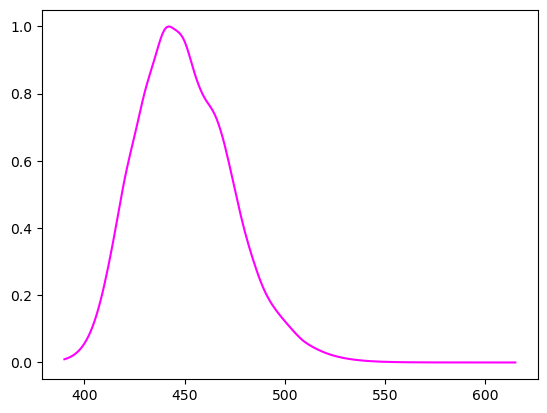

In [12]:
Cone.s_cone().plot()

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)
trichromat = Observer.trichromat(illuminant=d65)
tetrachromat = Observer.tetrachromat(illuminant=d65)

In [5]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

our 

In [6]:
tetrachromat.observe(cijk["1111"])

array([ 0.29939459,  0.2635604 ,  0.27407844,  0.29817291])

In [7]:
xyz = cijk["1111"].to_xyz()

In [8]:
XYZ_to_LMS = np.array([
    [0.4002, 0.7076, -0.0808],
    [-0.2263, 1.1653, 0.0457],
    [0, 0, 0.9182]
])

In [9]:
xyz

array([ 0.2741328 ,  0.23822425,  0.27685381])

In [10]:
XYZ_to_LMS @ xyz

array([ 0.25590564,  0.22821868,  0.25420717])